In [1]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [2]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [3]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [4]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [5]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [6]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [7]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [8]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [9]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [10]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [11]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [12]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [13]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [14]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [15]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [16]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [17]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [18]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [21]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [22]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [23]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Assuming 'combined_snli_df' is already loaded as described

# Features and Labels
X_snli = combined_snli_df.drop('True_Label', axis=1).values
y_snli = combined_snli_df['True_Label'].values

# Features and Labels
X_mnli_matched = combined_mnli_matched_df.drop('True_Label', axis=1).values
y_mnli_matched = combined_mnli_matched_df['True_Label'].values

# Features and Labels
X_mnli_mismatched = combined_mnli_mismatched_df.drop('True_Label', axis=1).values
y_mnli_mismatched = combined_mnli_mismatched_df['True_Label'].values

# Features and Labels
X_anli_r1 = combined_anli_r1_df.drop('True_Label', axis=1).values
y_anli_r1 = combined_anli_r1_df['True_Label'].values

# Features and Labels
X_anli_r2 = combined_anli_r2_df.drop('True_Label', axis=1).values
y_anli_r2 = combined_anli_r2_df['True_Label'].values

# Features and Labels
X_anli_r3 = combined_anli_r3_df.drop('True_Label', axis=1).values
y_anli_r3 = combined_anli_r3_df['True_Label'].values


2024-04-30 14:02:35.463760: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 14:02:35.463878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 14:02:35.569646: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
# One-hot encode labels
y_encoded_snli = tf.keras.utils.to_categorical(y_snli)
# One-hot encode labels
y_encoded_mnli_matched = tf.keras.utils.to_categorical(y_mnli_matched)
# One-hot encode labels
y_encoded_mnli_mismatched = tf.keras.utils.to_categorical(y_mnli_mismatched)
# One-hot encode labels
y_encoded_anli_r1 = tf.keras.utils.to_categorical(y_anli_r1)
# One-hot encode labels
y_encoded_anli_r2 = tf.keras.utils.to_categorical(y_anli_r2)
# One-hot encode labels
y_encoded_anli_r3 = tf.keras.utils.to_categorical(y_anli_r3)

In [26]:
X_snli_lstm = X_snli.reshape(X_snli.shape[0], 1, X_snli.shape[1])
X_mnli_matched_lstm = X_mnli_matched.reshape(X_mnli_matched.shape[0], 1, X_mnli_matched.shape[1])
X_mnli_mismatched_lstm = X_mnli_mismatched.reshape(X_mnli_mismatched.shape[0], 1, X_mnli_mismatched.shape[1])
X_anli_r1_lstm = X_anli_r1.reshape(X_anli_r1.shape[0], 1, X_anli_r1.shape[1])
X_anli_r2_lstm = X_anli_r2.reshape(X_anli_r2.shape[0], 1, X_anli_r2.shape[1])
X_anli_r3_lstm= X_anli_r3.reshape(X_anli_r3.shape[0], 1, X_anli_r3.shape[1])


In [27]:
X_snli_lstm

array([[[3.4766793e-02, 9.6259177e-01, 2.6414103e-03, ...,
         8.6525280e-03, 9.4743400e-01, 4.3913495e-02]],

       [[1.9208064e-03, 3.1903190e-01, 6.7904730e-01, ...,
         7.4033150e-01, 2.5643367e-01, 3.2348454e-03]],

       [[9.9878270e-01, 7.6433434e-04, 4.5297167e-04, ...,
         4.6765395e-03, 6.0480673e-02, 9.3484277e-01]],

       ...,

       [[9.9917114e-01, 4.9286430e-04, 3.3603658e-04, ...,
         8.3751883e-04, 2.6697412e-03, 9.9649280e-01]],

       [[2.6664520e-04, 2.1777824e-03, 9.9755560e-01, ...,
         9.8434700e-01, 1.5223468e-02, 4.2961346e-04]],

       [[3.6407644e-03, 9.9522394e-01, 1.1352752e-03, ...,
         5.0470065e-03, 9.9021820e-01, 4.7347180e-03]]])

In [28]:
X_snli_lstm.shape

(9824, 1, 9)

In [29]:
# For SNLI
X_train_snli, X_test_snli, y_train_snli, y_test_snli = train_test_split(
    X_snli_lstm, y_encoded_snli, test_size=0.2, random_state=42)

# For MNLI Matched
X_train_mnli_matched, X_test_mnli_matched, y_train_mnli_matched, y_test_mnli_matched = train_test_split(
    X_mnli_matched_lstm, y_encoded_mnli_matched, test_size=0.2, random_state=42)

# For MNLI Mismatched
X_train_mnli_mismatched, X_test_mnli_mismatched, y_train_mnli_mismatched, y_test_mnli_mismatched = train_test_split(
    X_mnli_mismatched_lstm, y_encoded_mnli_mismatched, test_size=0.2, random_state=42)

# For ANLI R1
X_train_anli_r1, X_test_anli_r1, y_train_anli_r1, y_test_anli_r1 = train_test_split(
    X_anli_r1_lstm, y_encoded_anli_r1, test_size=0.2, random_state=42)

# For ANLI R2
X_train_anli_r2, X_test_anli_r2, y_train_anli_r2, y_test_anli_r2 = train_test_split(
    X_anli_r2_lstm, y_encoded_anli_r2, test_size=0.2, random_state=42)

# For ANLI R3
X_train_anli_r3, X_test_anli_r3, y_train_anli_r3, y_test_anli_r3 = train_test_split(
    X_anli_r3_lstm, y_encoded_anli_r3, test_size=0.2, random_state=42)


In [32]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),  # First LSTM layer
        Dropout(0.5),
        LSTM(64),  # Second LSTM layer
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



def train_and_evaluate_lstm(task_name, X_train, y_train, X_test, y_test):
    print(f"Training LSTM for {task_name}...")

    # Create and train the model
    model = create_lstm_model(X_train.shape[1:], y_train.shape[1])
    history = model.fit(
        X_train, 
        y_train, 
        epochs=10, 
        batch_size=32, 
        validation_data=(X_test, y_test),
        callbacks=[EarlyStopping(patience=3, monitor='val_loss')]  # Optional early stopping
    )

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"{task_name} - Test accuracy: {test_acc:.3f}, Test loss: {test_loss:.3f}")

    # Return the model, history, accuracy, and loss
    return model, history, test_acc, test_loss

def plot_training_history(history, task_name):
    # Set up a 2x2 grid of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Training and Validation Metrics for {task_name}')

    # Plot training & validation accuracy values
    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend()

    # Plot training & validation loss values
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend()

    plt.show()



Training LSTM for SNLI...
Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8754 - loss: 0.6621 - val_accuracy: 0.9298 - val_loss: 0.2217
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9292 - loss: 0.2354 - val_accuracy: 0.9313 - val_loss: 0.2191
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9253 - loss: 0.2409 - val_accuracy: 0.9313 - val_loss: 0.2187
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9293 - loss: 0.2290 - val_accuracy: 0.9313 - val_loss: 0.2184
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9196 - loss: 0.2428 - val_accuracy: 0.9328 - val_loss: 0.2148
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9255 - loss: 0.2427 - val_accuracy: 0.9318 - val_loss: 0.2171
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9217 - loss: 0.2446 - val_accuracy: 0.9328 - val_loss: 0.2166
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9271 - loss:

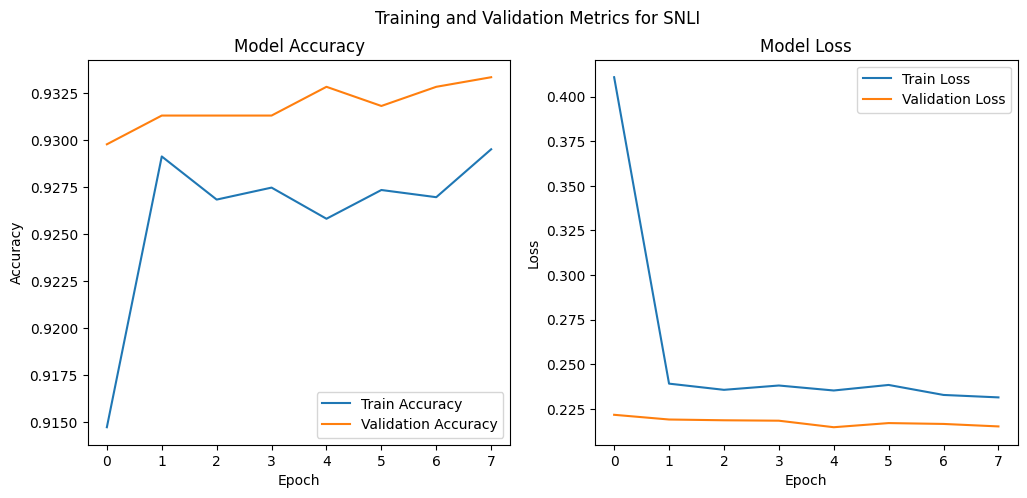

In [34]:
# Example usage:
model_snli, history_snli, test_acc_snli, test_loss_snli = train_and_evaluate_lstm("SNLI", X_train_snli, y_train_snli, X_test_snli, y_test_snli)
plot_training_history(history_snli, "SNLI")


Training LSTM for MNLI Matched...
Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8615 - loss: 0.6871 - val_accuracy: 0.9226 - val_loss: 0.2285
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9142 - loss: 0.2726 - val_accuracy: 0.9215 - val_loss: 0.2290
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9145 - loss: 0.2758 - val_accuracy: 0.9215 - val_loss: 0.2261
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9149 - loss: 0.2705 - val_accuracy: 0.9215 - val_loss: 0.2270
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9209 - loss: 0.2587 - val_accuracy: 0.9210 - val_loss: 0.2263
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9157 - loss: 0.2656 - val_accuracy: 0.9210 - val_loss: 0.2247
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9217 - loss: 0.2563 - val_accuracy: 0.9221 - val_loss: 0.2247
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9157

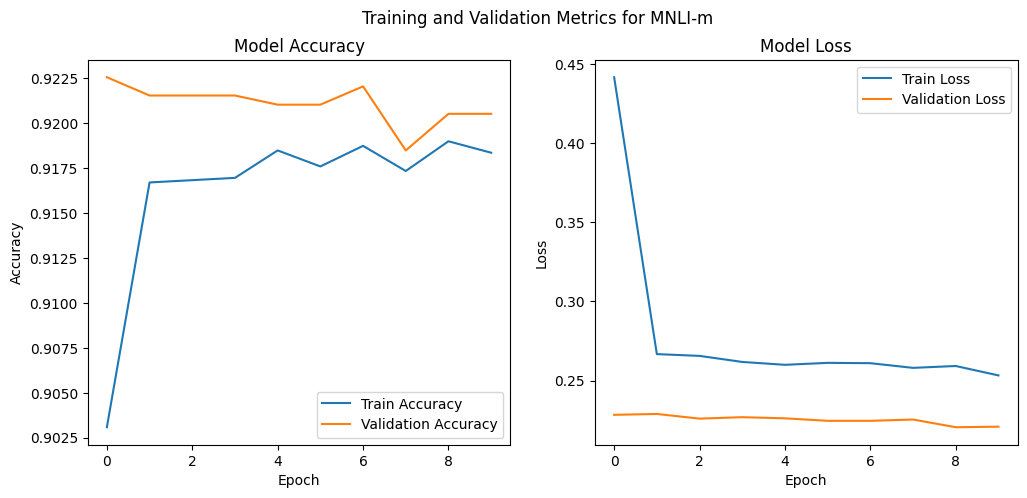

In [36]:
# Train and evaluate for MNLI Matched
model_mnli_matched, history_mnli_matched, test_acc_mnli_matched, test_loss_mnli_matched = train_and_evaluate_lstm(
    "MNLI Matched", X_train_mnli_matched, y_train_mnli_matched, X_test_mnli_matched, y_test_mnli_matched)
plot_training_history(history_mnli_matched, "MNLI-m")

Training LSTM for MNLI Mismatched...
Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8688 - loss: 0.6720 - val_accuracy: 0.9181 - val_loss: 0.2562
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9148 - loss: 0.2670 - val_accuracy: 0.9171 - val_loss: 0.2547
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9135 - loss: 0.2693 - val_accuracy: 0.9166 - val_loss: 0.2550
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9131 - loss: 0.2660 - val_accuracy: 0.9192 - val_loss: 0.2528
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9174 - loss: 0.2605 - val_accuracy: 0.9197 - val_loss: 0.2532
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9136 - loss: 0.2636 - val_accuracy: 0.9176 - val_loss: 0.2549
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9205 - loss: 0.2514 - val_accuracy: 0.9192 - val_loss: 0.2527
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9

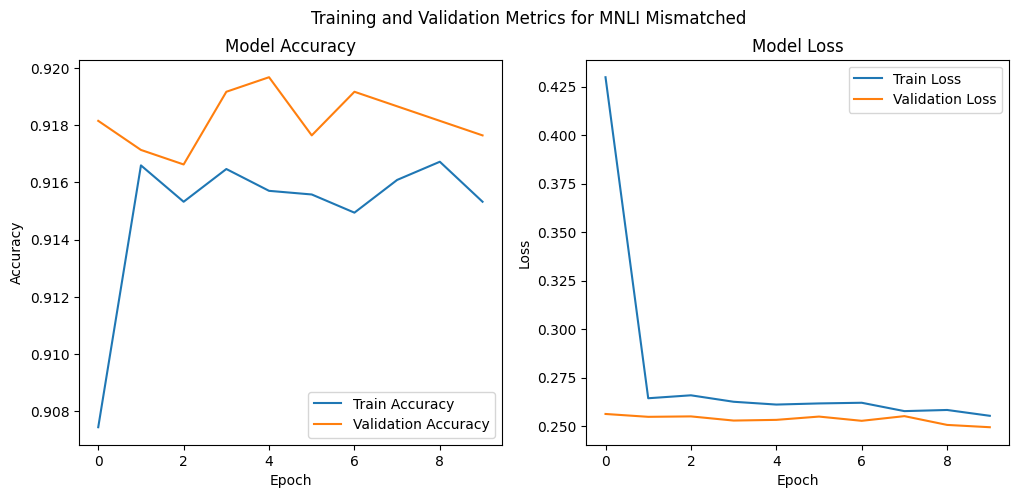

In [37]:
# MNLI Mismatched
model_mnli_mismatched, history_mnli_mismatched, test_acc_mnli_mismatched, test_loss_mnli_mismatched = train_and_evaluate_lstm(
    "MNLI Mismatched", X_train_mnli_mismatched, y_train_mnli_mismatched, X_test_mnli_mismatched, y_test_mnli_mismatched)
plot_training_history(history_mnli_mismatched, "MNLI Mismatched")

Training LSTM for ANLI R1...
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5192 - loss: 1.0895 - val_accuracy: 0.7250 - val_loss: 1.0566
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7282 - loss: 1.0202 - val_accuracy: 0.7050 - val_loss: 0.9480
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7517 - loss: 0.8469 - val_accuracy: 0.7050 - val_loss: 0.8170
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7564 - loss: 0.6714 - val_accuracy: 0.7050 - val_loss: 0.7943
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7827 - loss: 0.5864 - val_accuracy: 0.6950 - val_loss: 0.7948
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.6214 - val_accuracy: 0.7050 - val_loss: 0.7768
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7799 - loss: 0.5998 - val_accuracy: 0.7100 - val_loss: 0.7719
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7495 - loss: 0.6496 - va

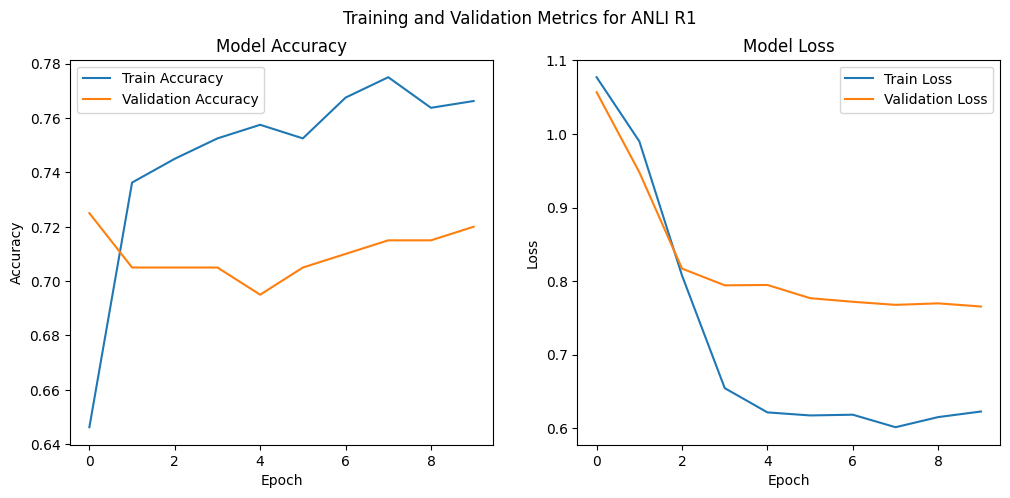

In [38]:
# ANLI Round 1
model_anli_r1, history_anli_r1, test_acc_anli_r1, test_loss_anli_r1 = train_and_evaluate_lstm(
    "ANLI R1", X_train_anli_r1, y_train_anli_r1, X_test_anli_r1, y_test_anli_r1)
plot_training_history(history_anli_r1, "ANLI R1")


Training LSTM for ANLI R2...
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4897 - loss: 1.0915 - val_accuracy: 0.7450 - val_loss: 1.0643
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6481 - loss: 1.0463 - val_accuracy: 0.7050 - val_loss: 0.9800
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6579 - loss: 0.9418 - val_accuracy: 0.6950 - val_loss: 0.8641
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6496 - loss: 0.8397 - val_accuracy: 0.7400 - val_loss: 0.7974
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6546 - loss: 0.8064 - val_accuracy: 0.7200 - val_loss: 0.7748
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6824 - loss: 0.7783 - val_accuracy: 0.7300 - val_loss: 0.7607
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6784 - loss: 0.7644 - val_accuracy: 0.7350 - val_loss: 0.7592
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6864 - loss: 0.8028 - va

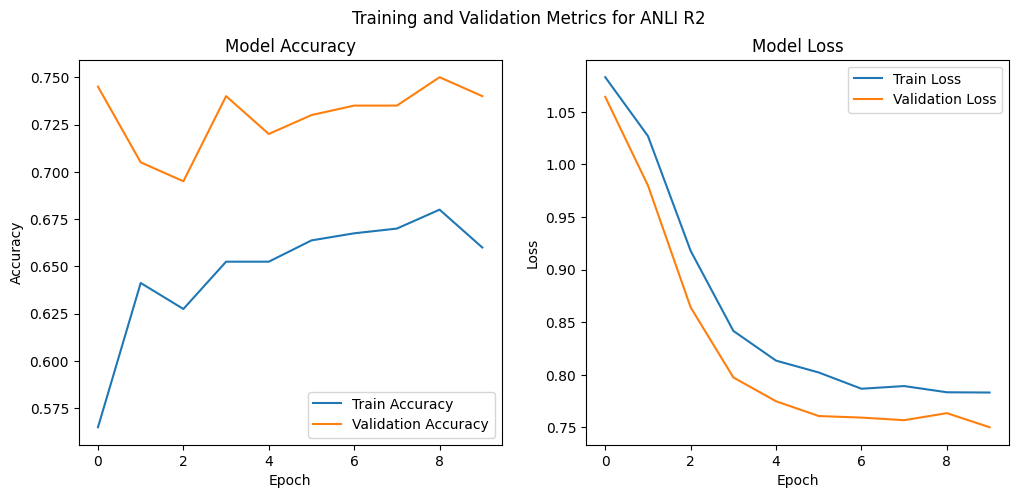

In [39]:
# ANLI Round 2
model_anli_r2, history_anli_r2, test_acc_anli_r2, test_loss_anli_r2 = train_and_evaluate_lstm(
    "ANLI R2", X_train_anli_r2, y_train_anli_r2, X_test_anli_r2, y_test_anli_r2)
plot_training_history(history_anli_r2, "ANLI R2")

Training LSTM for ANLI R3...
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4568 - loss: 1.0906 - val_accuracy: 0.6958 - val_loss: 1.0475
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6045 - loss: 1.0392 - val_accuracy: 0.6917 - val_loss: 0.8959
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6207 - loss: 0.9002 - val_accuracy: 0.6917 - val_loss: 0.7331
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6373 - loss: 0.8241 - val_accuracy: 0.6958 - val_loss: 0.6988
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6376 - loss: 0.8119 - val_accuracy: 0.6958 - val_loss: 0.6892
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6676 - loss: 0.7827 - val_accuracy: 0.6958 - val_loss: 0.6865
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6771 - loss: 0.7951 - val_accuracy: 0.7042 - val_loss: 0.6775
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6431 - loss: 0.8353 - va

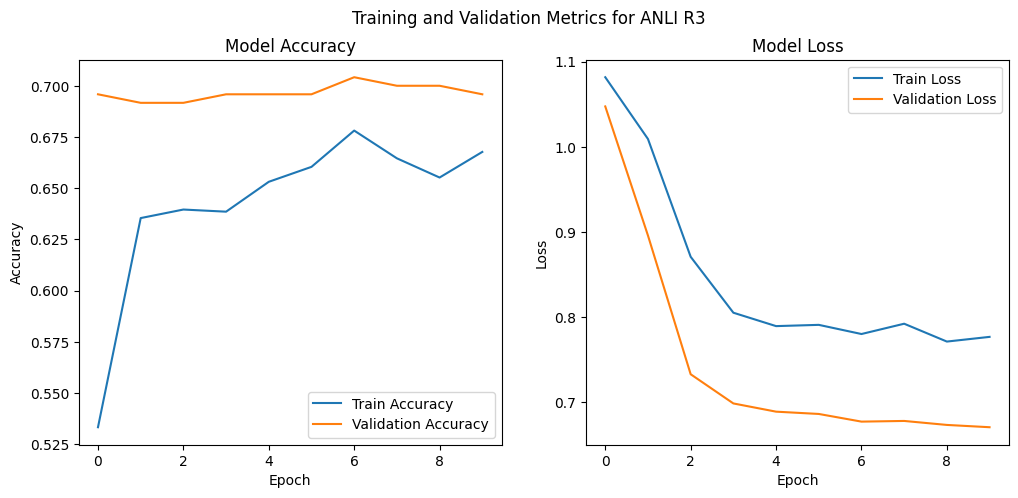

In [40]:
# ANLI Round 3
model_anli_r3, history_anli_r3, test_acc_anli_r3, test_loss_anli_r3 = train_and_evaluate_lstm(
    "ANLI R3", X_train_anli_r3, y_train_anli_r3, X_test_anli_r3, y_test_anli_r3)
plot_training_history(history_anli_r3, "ANLI R3")

In [41]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Assuming your feature arrays are loaded as X_snli_lstm, etc.
# Assuming your encoded labels are loaded as y_encoded_snli, etc.

# Determining the maximum number of features
max_features = max(
    X_snli_lstm.shape[2], 
    X_mnli_matched_lstm.shape[2], 
    X_mnli_mismatched_lstm.shape[2],
    X_anli_r1_lstm.shape[2], 
    X_anli_r2_lstm.shape[2], 
    X_anli_r3_lstm.shape[2]
)

# Function to pad arrays to the maximum feature size
def pad_features(X, max_features):
    feature_length = X.shape[2]
    if feature_length < max_features:
        padding = max_features - feature_length
        return np.pad(X, ((0, 0), (0, 0), (0, padding)), 'constant')
    return X

# Pad and reshape each dataset for RNN input
X_snli_padded = pad_features(X_snli_lstm, max_features)
X_mnli_matched_padded = pad_features(X_mnli_matched_lstm, max_features)
X_mnli_mismatched_padded = pad_features(X_mnli_mismatched_lstm, max_features)
X_anli_r1_padded = pad_features(X_anli_r1_lstm, max_features)
X_anli_r2_padded = pad_features(X_anli_r2_lstm, max_features)
X_anli_r3_padded = pad_features(X_anli_r3_lstm, max_features)

# Concatenate all reshaped and padded arrays
X_combined_lstm = np.concatenate((
    X_snli_padded, 
    X_mnli_matched_padded, 
    X_mnli_mismatched_padded, 
    X_anli_r1_padded, 
    X_anli_r2_padded, 
    X_anli_r3_padded
), axis=0)

y_combined = np.concatenate((
    y_encoded_snli, 
    y_encoded_mnli_matched, 
    y_encoded_mnli_mismatched, 
    y_encoded_anli_r1, 
    y_encoded_anli_r2, 
    y_encoded_anli_r3
), axis=0)

print("Shape of combined feature set:", X_combined_lstm.shape)
print("Shape of combined label set:", y_combined.shape)


Shape of combined feature set: (32671, 1, 9)
Shape of combined label set: (32671, 3)


Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8733 - loss: 0.6178 - val_accuracy: 0.8908 - val_loss: 0.3185
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8956 - loss: 0.3162 - val_accuracy: 0.8912 - val_loss: 0.3171
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8935 - loss: 0.3172 - val_accuracy: 0.8912 - val_loss: 0.3188
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8970 - loss: 0.3132 - val_accuracy: 0.8908 - val_loss: 0.3160
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8969 - loss: 0.3156 - val_accuracy: 0.8925 - val_loss: 0.3153
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8975 - loss: 0.3046 - val_accuracy: 0.8917 - val_loss: 0.3163
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9027 - loss: 0.2972 - val_accuracy: 0.8912 - val_loss: 0.3088
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8998 - loss: 0.2989 - val_accuracy: 0.

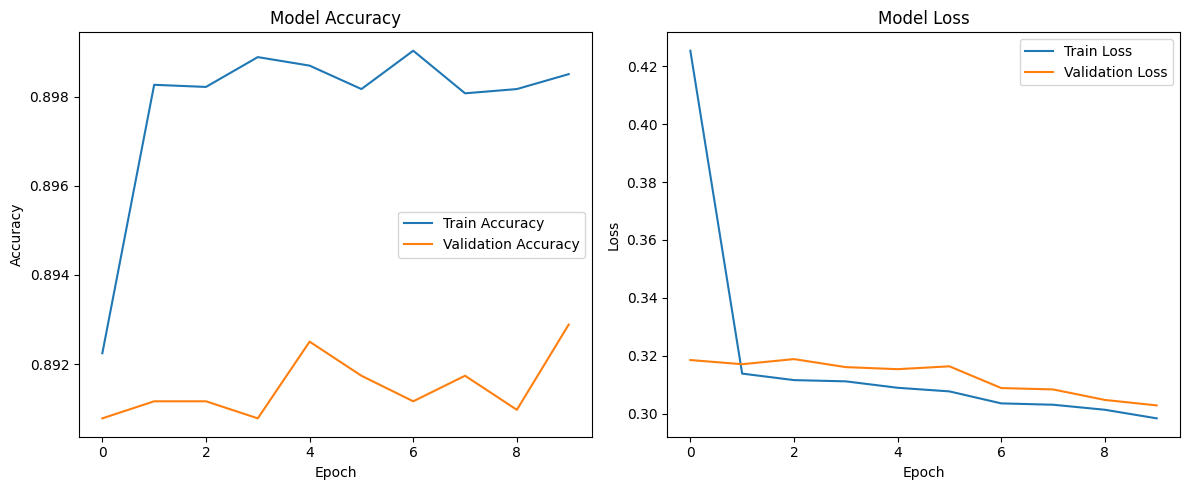

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9038 - loss: 0.2732
Test accuracy: 0.8938025832176208, Test loss: 0.2955155670642853
Model saved as LSTM_combined_ensemble.h5


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Function to create the LSTM model
def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),  # First LSTM layer
        Dropout(0.5),
        LSTM(64, return_sequences=False),  # Second LSTM layer
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer with softmax for classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_lstm, y_combined, test_size=0.2, random_state=42)

# Create the model
model = create_lstm_model((1, 9), 3)  # 1 step with 9 features, 3 output classes
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Function to plot training and validation accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

# Save the model
model.save('LSTM_combined_ensemble.h5')
print("Model saved as LSTM_combined_ensemble.h5")
